In [7]:
from cetsp.common import TourInstance, Circle
from cetsp.heuristics import find_cetsp_solution_via_2opttsp

instance = TourInstance(
    [Circle(0, 0, 1), Circle(3, 0, 1), Circle(5, 2, 1), Circle(0, 5, 1), Circle(7, 7, 1),
     Circle(3, 3, 1), Circle(0, 4, 1)])
instance = [
    Circle(2*x, 2*y, 1) for x in range(7) for y in range(7)
]
heuristic_solution = find_cetsp_solution_via_2opttsp(instance)

Building model.
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-8559U CPU @ 2.70GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 196 rows, 343 columns and 490 nonzeros
Model fingerprint: 0x9ccf060c
Model has 98 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
  QRHS range       [1e+00, 1e+00]
Presolve removed 98 rows and 98 columns
Presolve time: 0.01s
Presolved: 147 rows, 294 columns, 343 nonzeros
Presolved model has 98 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.410e+02
 Factor NZ  : 2.117e+03
 Factor Ops : 3.609e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     

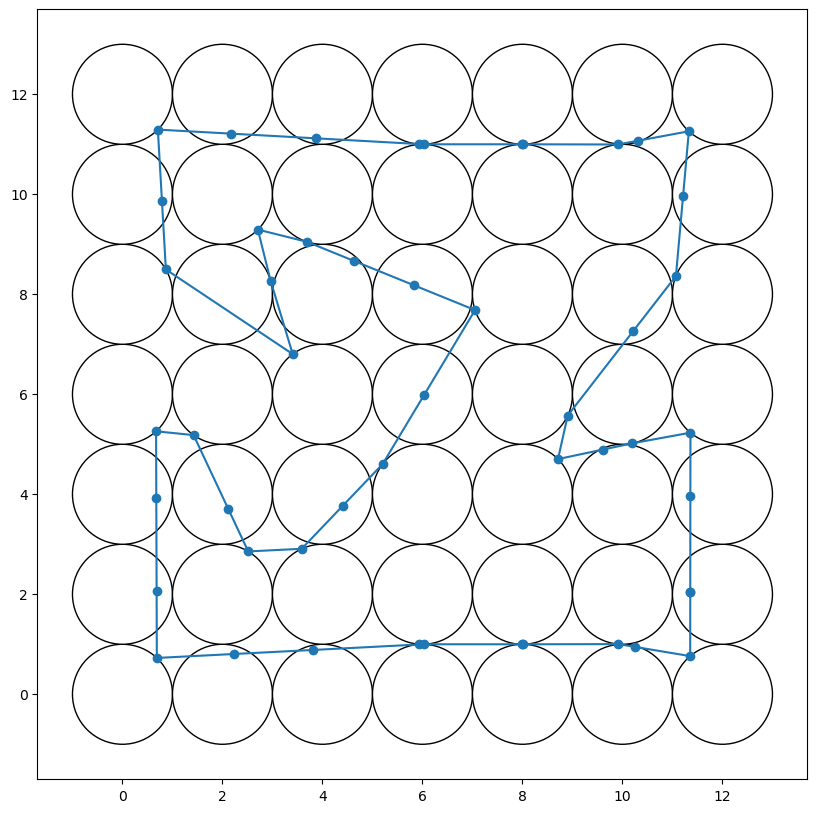

In [8]:
from cetsp.common.tour import plot_solution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance,heuristic_solution)

In [9]:
from cetsp.bnb import BnBTree

bnb = BnBTree(instance)
bnb.add_solution(heuristic_solution)

Found solution of value 63.78735421029344


In [10]:
while bnb.step():
    pass

Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 0, r=1)])) on Circle(12, 12, r=1).
Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 12, r=1), Circle(12, 0, r=1)])) on Circle(6, 6, r=1).
Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 12, r=1), Circle(6, 6, r=1), Circle(12, 0, r=1)])) on Circle(12, 6, r=1).
Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 12, r=1), Circle(6, 6, r=1), Circle(12, 6, r=1), Circle(12, 0, r=1)])) on Circle(4, 4, r=1).
Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 12, r=1), Circle(6, 6, r=1), Circle(12, 6, r=1), Circle(4, 4, r=1), Circle(12, 0, r=1)])) on Circle(4, 8, r=1).
Branch Node(PartialSolution([Circle(0, 0, r=1), Circle(0, 12, r=1), Circle(12, 12, r=1), Circle(6, 6, r=1), Circle(12, 6, r=1), Circle(4, 4, r=1), Circle(4, 8, r=1), Circle(12, 0, r=1)])) on Circle(12, 8, r=1).
Prune 64.48975387915016
Pr

In [11]:
bnb.best_solution.value()

55.10933878689064

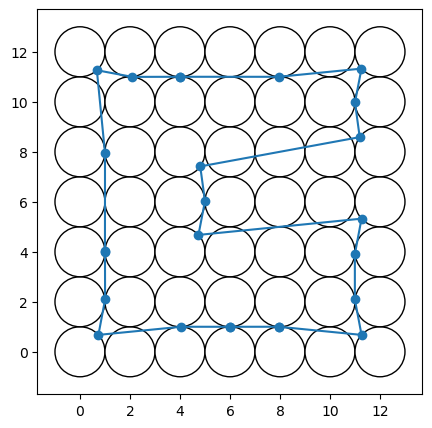

In [12]:

from cetsp.common.tour import plot_solution
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, bnb.best_solution)